<h1>Paulo Loyola - Data Analysis Skill Test - Case 1</h1>

Importing the libraries I'm going to use in this test.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import zipfile

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller

%matplotlib inline
plt.rcParams["figure.figsize"] = (16,7)

Loading the data

In [2]:
zf = zipfile.ZipFile('Challenge_4i.zip') 
data1 = pd.read_csv(zf.open('TFP.csv'))

<h2>Questions 1 and 2</h2>

In [3]:
data1.head()

,isocode,year,rtfpna
0,USA,1950,0.617148
1,USA,1951,0.629588
2,USA,1952,0.638451
3,USA,1953,0.651858
4,USA,1954,0.646179


In [4]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
year,186.0,1980.500000,17.943831,1950.000000,1965.000000,1980.500000,1996.000000,2011.000000
rtfpna,186.0,0.975614,0.177538,0.617148,0.855143,0.995047,1.046348,1.383718


In [5]:
data1['year'] = pd.to_datetime(data1['year'], format = '%Y').dt.year

In [6]:
data1['isocode'].value_counts()

MEX    62
USA    62
CAN    62
Name: isocode, dtype: int64

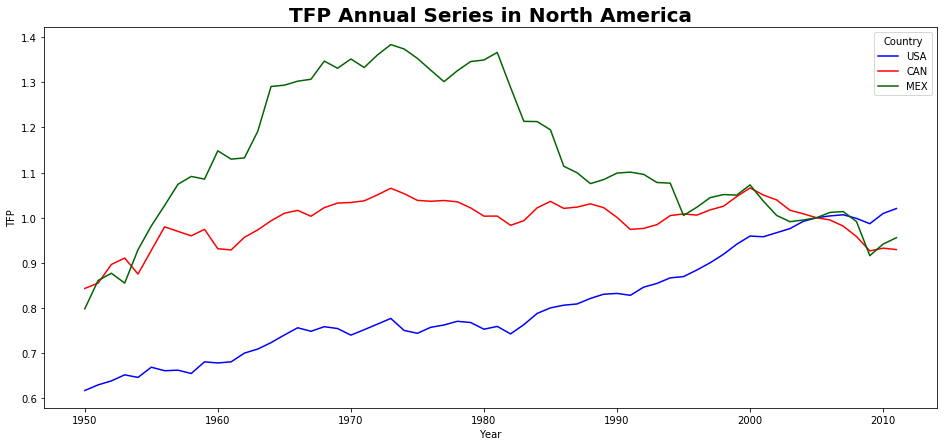

In [7]:
sns.lineplot(x = "year", y = "rtfpna", hue="isocode", data=data1, palette = ['blue', 'red', 'darkgreen'])
plt.ylabel("TFP")
plt.xlabel("Year")
plt.legend(title = 'Country', labels=['USA', 'CAN', 'MEX'])
plt.title('TFP Annual Series in North America', size = 20, weight='semibold')
plt.show()

<h3>Canada</h3>

In [8]:
canada = data1[data1['isocode'] == 'CAN']
canada.set_index('year')

,isocode,rtfpna
year,,
1950,CAN,0.843335
1951,CAN,0.855123
1952,CAN,0.896489
1953,CAN,0.910658
1954,CAN,0.875178
...,...,...
2007,CAN,0.981433
2008,CAN,0.958357
2009,CAN,0.926482


In [9]:
result = adfuller(canada['rtfpna'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -3.027753
p-value: 0.032383


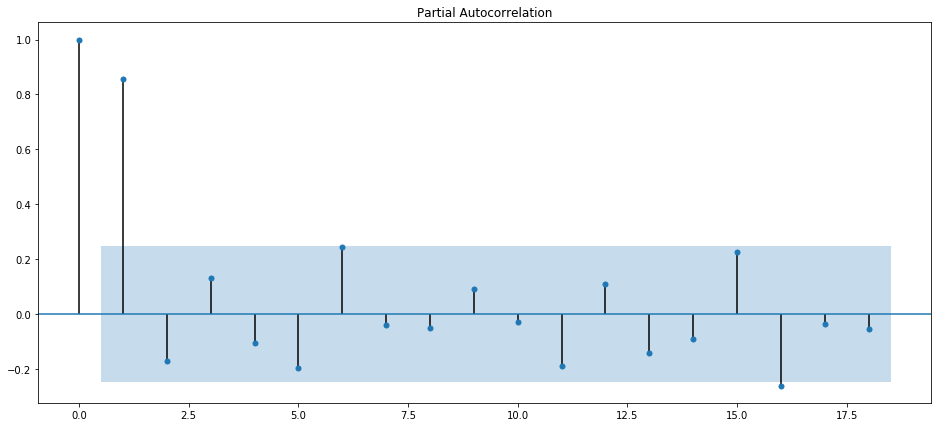

In [10]:
plot_pacf(canada['rtfpna']);

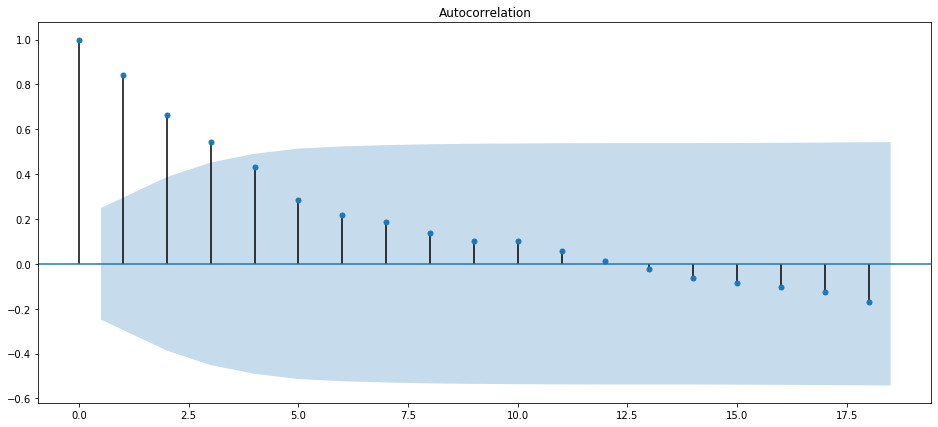

In [11]:
plot_acf(canada['rtfpna']);

Ok. I'll also account for the possibility that p and q may be equal to zero. So I'm going to test the following ARIMA models:

* (0, 0, 0)
* (0, 0, 1)
* (0, 0, 2)
* (0, 0, 3)
* (1, 0, 0)
* (1, 0, 1)
* (1, 0, 2)
* (1, 0, 3)

In [12]:
# fitting the models.
AR = [0, 1]
MA = [0, 1, 2, 3]
models = pd.DataFrame(columns = ['ARIMA', 'AIC', 'BIC'])
for p in range(len(AR)):
    for q in range(len(MA)):
        try:
            model = ARIMA(canada['rtfpna'], order = (AR[p], 0, MA[q]))
            model_fit = model.fit()
            values = pd.Series([(AR[p], 0, MA[q]), model_fit.aic, model_fit.bic], index = ['ARIMA', 'AIC', 'BIC'])
            models = models.append(values, ignore_index = True)
        except: pass
models

C:\Users\Paulo\.conda\envs\Kaggle\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Paulo\.conda\envs\Kaggle\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Paulo\.conda\envs\Kaggle\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Paulo\.conda\envs\Kaggle\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Paulo\.conda\envs\Kaggle\lib\site-packages\statsmodels\tsa\

,ARIMA,AIC,BIC
0,"(0, 0, 0)",-192.219117,-187.964848
1,"(0, 0, 1)",-252.212049,-245.830645
2,"(0, 0, 2)",-285.041669,-276.533131
3,"(0, 0, 3)",-289.163457,-278.527785
4,"(1, 0, 0)",-307.468860,-301.087457
5,"(1, 0, 1)",-313.079318,-304.570781
6,"(1, 0, 2)",-312.428291,-301.792619
7,"(1, 0, 3)",-310.480785,-297.717979


In [13]:
canadaModel = ARIMA(canada['rtfpna'], order=(1,0,1))
canadaModel = canadaModel.fit()
print(canadaModel.summary())

                              ARMA Model Results                              
Dep. Variable:                 rtfpna   No. Observations:                   62
Model:                     ARMA(1, 1)   Log Likelihood                 160.540
Method:                       css-mle   S.D. of innovations              0.018
Date:                Wed, 08 Jul 2020   AIC                           -313.079
Time:                        11:15:33   BIC                           -304.571
Sample:                             0   HQIC                          -309.739
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.9646      0.036     26.504      0.000       0.893       1.036
ar.L1.rtfpna     0.9128      0.062     14.820      0.000       0.792       1.034
ma.L1.rtfpna     0.4774      0.133      3.60

C:\Users\Paulo\.conda\envs\Kaggle\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


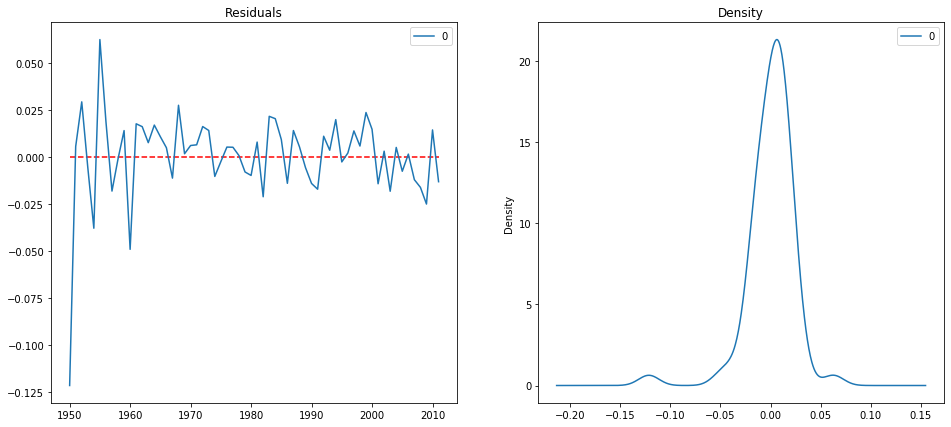

In [14]:
# Plot residual errors
canadaResiduals = pd.DataFrame(canadaModel.resid)
canadaResiduals.set_index(pd.Series(list(range(1950, 2012))), inplace = True)
fig, ax = plt.subplots(1,2)
canadaResiduals.plot(title="Residuals", ax=ax[0]).hlines(y = 0, xmin = 1950, xmax = 2011, color = 'red', linestyles = 'dashed')
#plot residuals density
canadaResiduals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [15]:
canadaNext10 = canadaModel.forecast(steps = 10, alpha = 0.05)
ci1canada = []
ci2canada = []
for i in range(len(canadaNext10[2])):
    ci1canada.append(canadaNext10[2][i][0])
    ci2canada.append(canadaNext10[2][i][1])

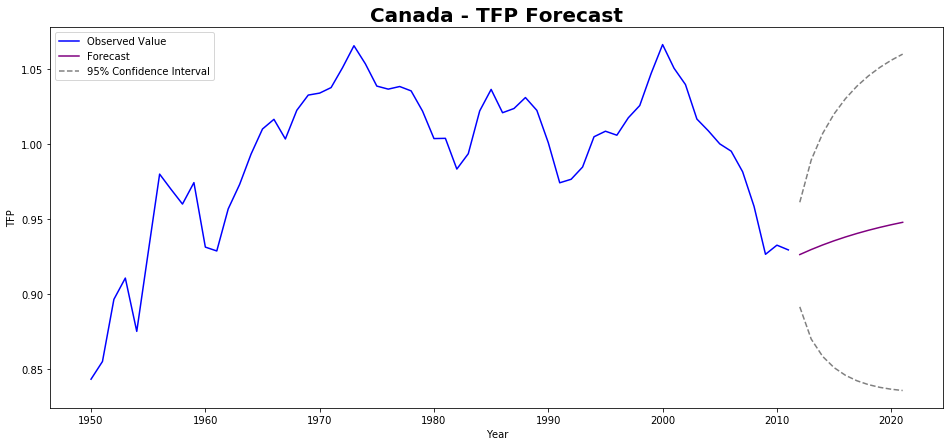

In [16]:
plt.plot(range(1950, 2012), canada['rtfpna'], color = 'blue', label = 'Observed Value')
plt.plot(range(2012, 2022), canadaNext10[0], color = 'purple', label = 'Forecast')
plt.plot(range(2012, 2022), ci1canada, linestyle = 'dashed', color = 'gray')
plt.plot(range(2012, 2022), ci2canada, linestyle = 'dashed', color = 'gray', label = '95% Confidence Interval')
plt.title('Canada - TFP Forecast', size = 20, weight='semibold')
plt.ylabel('TFP')
plt.xlabel('Year')
plt.legend()
plt.show()

In [17]:
temp = pd.DataFrame(['CAN' for i in range(10)])
temp['year'] = range(2012, 2022)
temp['rtfpna'] = canadaNext10[0]
temp['ci1'] = ci1canada
temp['ci2'] = ci2canada
temp.columns.values[0] = 'isocode'
data1 = data1.append(temp, ignore_index = True)

<h3>USA</h3>

In [18]:
usa = data1[data1['isocode'] == 'USA']
usa.set_index('year')

,isocode,rtfpna,ci1,ci2
year,,,,
1950,USA,0.617148,NaN,NaN
1951,USA,0.629588,NaN,NaN
1952,USA,0.638451,NaN,NaN
1953,USA,0.651858,NaN,NaN
1954,USA,0.646179,NaN,NaN
...,...,...,...,...
2007,USA,1.006595,NaN,NaN
2008,USA,0.998499,NaN,NaN
2009,USA,0.986738,NaN,NaN


In [19]:
result = adfuller(usa['rtfpna'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 0.223647
p-value: 0.973557


In [20]:
result = adfuller(usa['rtfpna'].diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -7.384680
p-value: 0.000000


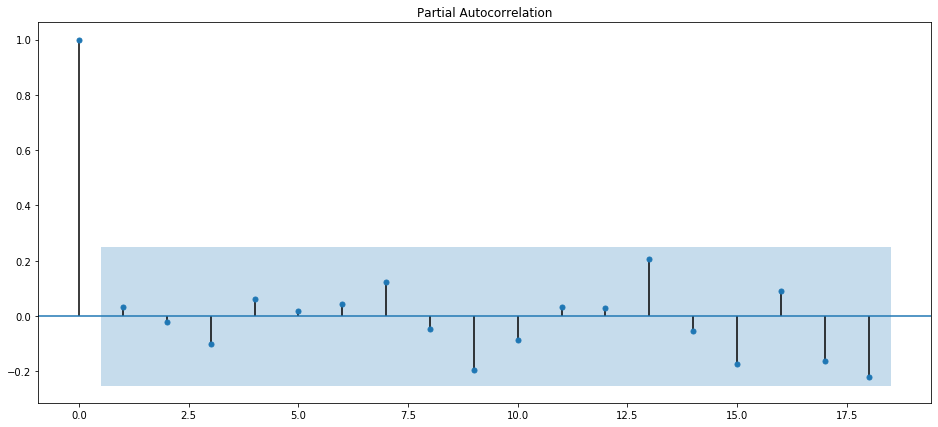

In [21]:
plot_pacf(usa['rtfpna'].diff().dropna());

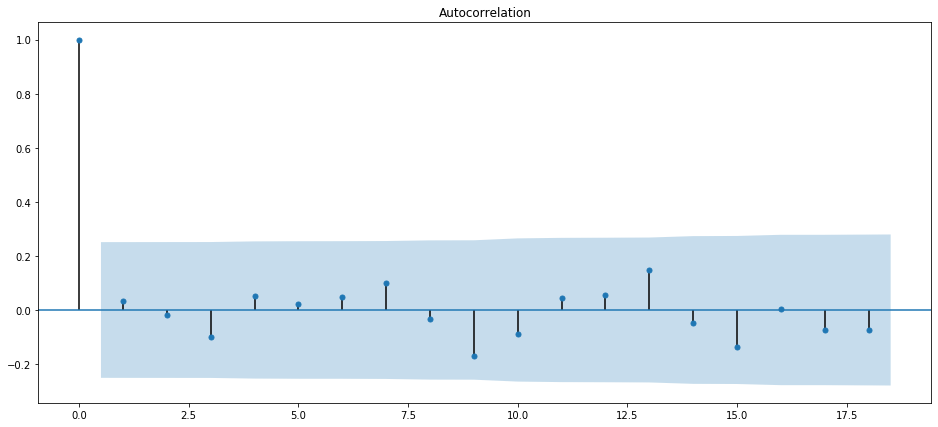

In [22]:
plot_acf(usa['rtfpna'].diff().dropna());

In [23]:
usaModel = ARIMA(usa['rtfpna'], order=(0,1,0))
usaModel = usaModel.fit()
print(usaModel.summary())

                             ARIMA Model Results                              
Dep. Variable:               D.rtfpna   No. Observations:                   61
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 187.087
Method:                           css   S.D. of innovations              0.011
Date:                Wed, 08 Jul 2020   AIC                           -370.173
Time:                        11:15:35   BIC                           -365.951
Sample:                             1   HQIC                          -368.519
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0066      0.001      4.583      0.000       0.004       0.009


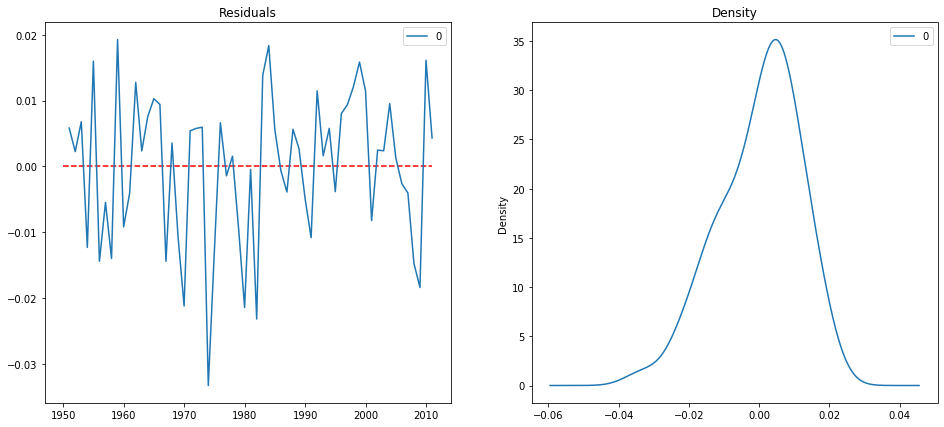

In [24]:
# Plot residual errors
usaResiduals = pd.DataFrame(usaModel.resid)
usaResiduals.set_index(pd.Series(list(range(1951, 2012))), inplace = True)
fig, ax = plt.subplots(1,2)
usaResiduals.plot(title="Residuals", ax=ax[0]).hlines(y = 0, xmin = 1950, xmax = 2011, color = 'red', linestyles = 'dashed')
#plot residuals density
usaResiduals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [25]:
usaNext10 = usaModel.forecast(steps = 10, alpha = 0.05)
ci1usa = []
ci2usa = []
for i in range(len(usaNext10[2])):
    ci1usa.append(usaNext10[2][i][0])
    ci2usa.append(usaNext10[2][i][1])

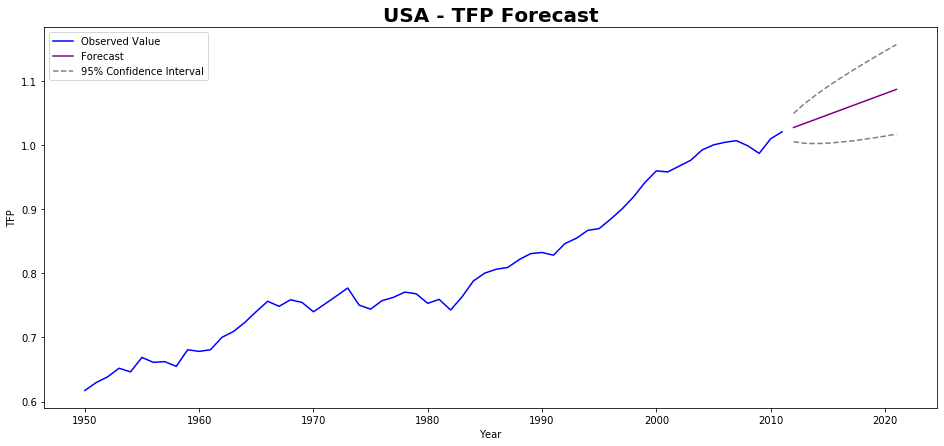

In [26]:
plt.plot(range(1950, 2012), usa['rtfpna'], color = 'blue', label = 'Observed Value')
plt.plot(range(2012, 2022), usaNext10[0], color = 'purple', label = 'Forecast')
plt.plot(range(2012, 2022), ci1usa, linestyle = 'dashed', color = 'gray')
plt.plot(range(2012, 2022), ci2usa, linestyle = 'dashed', color = 'gray', label = '95% Confidence Interval')
plt.title('USA - TFP Forecast', size = 20, weight='semibold')
plt.ylabel('TFP')
plt.xlabel('Year')
plt.legend()
plt.show()

In [27]:
temp = pd.DataFrame(['USA' for i in range(10)])
temp['year'] = range(2012, 2022)
temp['rtfpna'] = usaNext10[0]
temp['ci1'] = ci1usa
temp['ci2'] = ci2usa
temp.columns.values[0] = 'isocode'
data1 = data1.append(temp, ignore_index = True)

<h3>Mexico</h3>

In [28]:
mexico = data1[data1['isocode'] == 'MEX']
mexico.set_index('year')

,isocode,rtfpna,ci1,ci2
year,,,,
1950,MEX,0.798159,NaN,NaN
1951,MEX,0.860931,NaN,NaN
1952,MEX,0.876968,NaN,NaN
1953,MEX,0.855204,NaN,NaN
1954,MEX,0.929168,NaN,NaN
...,...,...,...,...
2007,MEX,1.013673,NaN,NaN
2008,MEX,0.991548,NaN,NaN
2009,MEX,0.915879,NaN,NaN


In [29]:
result = adfuller(mexico['rtfpna'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.940444
p-value: 0.313281


In [30]:
result = adfuller(mexico['rtfpna'].diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -5.954754
p-value: 0.000000


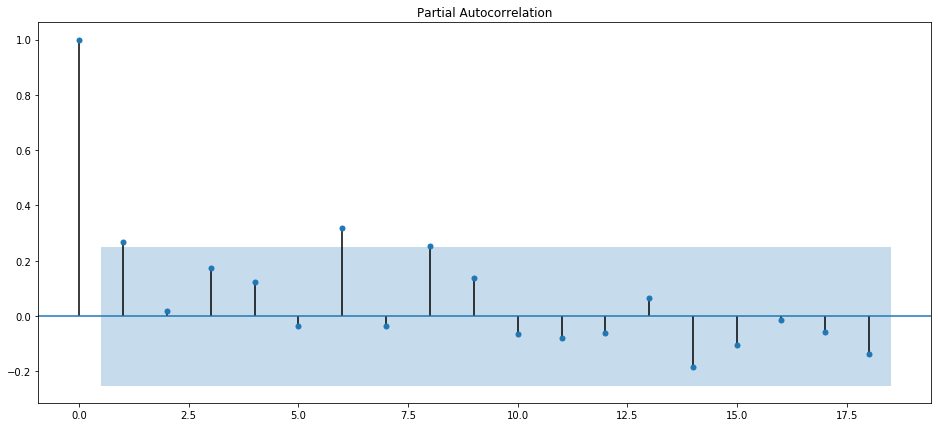

In [31]:
plot_pacf(mexico['rtfpna'].diff().dropna());

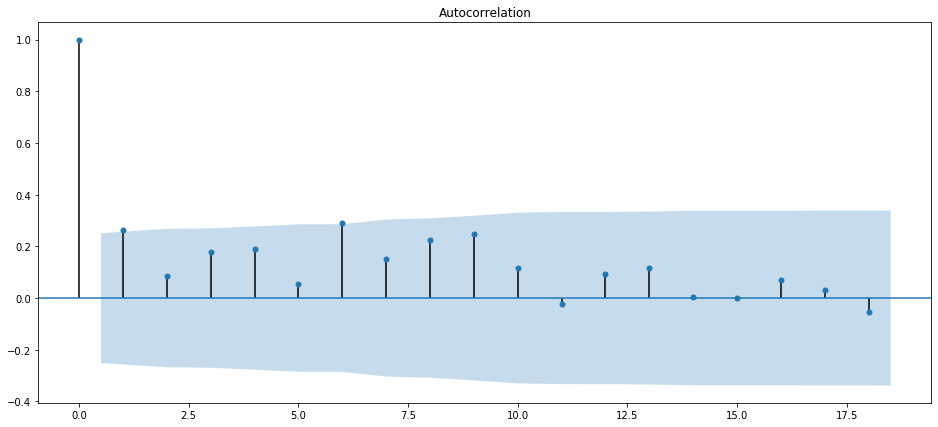

In [32]:
plot_acf(mexico['rtfpna'].diff().dropna());

In [33]:
# fitting the models.
AR = [0, 1]
MA = [0, 1]
models = pd.DataFrame(columns = ['ARIMA', 'AIC', 'BIC'])
for p in range(len(AR)):
    for q in range(len(MA)):
        try:
            model = ARIMA(mexico['rtfpna'], order = (AR[p], 1, MA[q]))
            model_fit = model.fit()
            values = pd.Series([(AR[p], 1, MA[q]), model_fit.aic, model_fit.bic], index = ['ARIMA', 'AIC', 'BIC'])
            models = models.append(values, ignore_index = True)
        except: pass
models

C:\Users\Paulo\.conda\envs\Kaggle\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Paulo\.conda\envs\Kaggle\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Paulo\.conda\envs\Kaggle\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Paulo\.conda\envs\Kaggle\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Paulo\.conda\envs\Kaggle\lib\site-packages\statsmodels\tsa\

,ARIMA,AIC,BIC
0,"(0, 1, 0)",-229.209476,-224.987729
1,"(0, 1, 1)",-231.581940,-225.249318
2,"(1, 1, 0)",-231.787061,-225.454440
3,"(1, 1, 1)",-232.785320,-224.341825


In [34]:
mexicoModel = ARIMA(mexico['rtfpna'], order=(1,1,0))
mexicoModel = mexicoModel.fit()
print(mexicoModel.summary())

                             ARIMA Model Results                              
Dep. Variable:               D.rtfpna   No. Observations:                   61
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 118.894
Method:                       css-mle   S.D. of innovations              0.034
Date:                Wed, 08 Jul 2020   AIC                           -231.787
Time:                        11:15:38   BIC                           -225.454
Sample:                             1   HQIC                          -229.305
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0030      0.006      0.500      0.617      -0.009       0.015
ar.L1.D.rtfpna     0.2733      0.125      2.184      0.029       0.028       0.519
                                    

C:\Users\Paulo\.conda\envs\Kaggle\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Paulo\.conda\envs\Kaggle\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


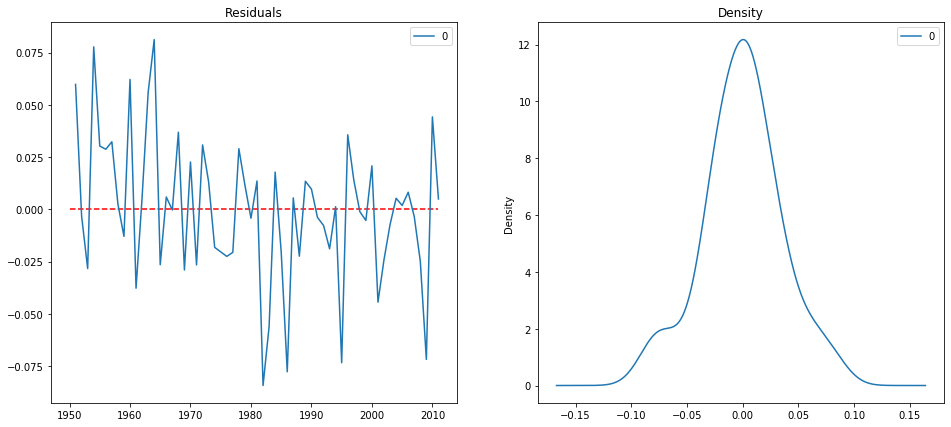

In [35]:
# Plot residual errors
mexicoResiduals = pd.DataFrame(mexicoModel.resid)
mexicoResiduals.set_index(pd.Series(list(range(1951, 2012))), inplace = True)
fig, ax = plt.subplots(1,2)
mexicoResiduals.plot(title="Residuals", ax=ax[0]).hlines(y = 0, xmin = 1950, xmax = 2011, color = 'red', linestyles = 'dashed')
#plot residuals density
mexicoResiduals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [36]:
mexicoNext10 = mexicoModel.forecast(steps = 10, alpha = 0.05)
ci1mexico = []
ci2mexico = []
for i in range(len(mexicoNext10[2])):
    ci1mexico.append(mexicoNext10[2][i][0])
    ci2mexico.append(mexicoNext10[2][i][1])

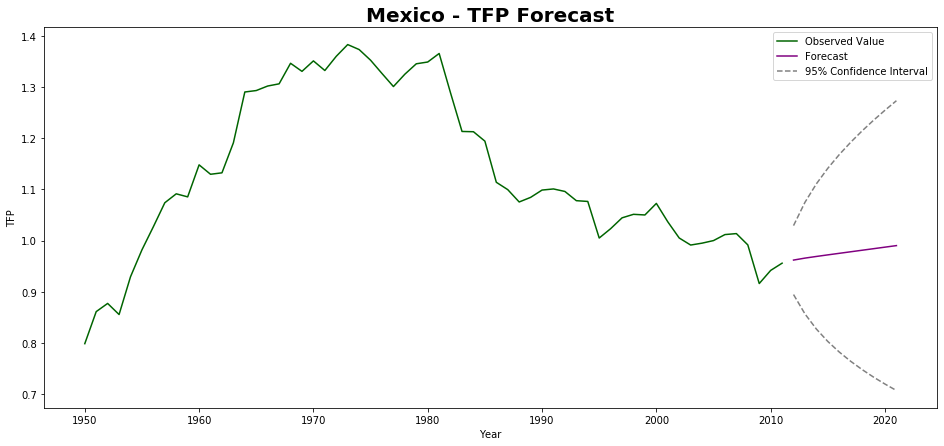

In [37]:
plt.plot(range(1950, 2012), mexico['rtfpna'], color = 'darkgreen', label = 'Observed Value')
plt.plot(range(2012, 2022), mexicoNext10[0], color = 'purple', label = 'Forecast')
plt.plot(range(2012, 2022), ci1mexico, linestyle = 'dashed', color = 'gray')
plt.plot(range(2012, 2022), ci2mexico, linestyle = 'dashed', color = 'gray', label = '95% Confidence Interval')
plt.title('Mexico - TFP Forecast', size = 20, weight='semibold')
plt.ylabel('TFP')
plt.xlabel('Year')
plt.legend()
plt.show()

In [38]:
temp = pd.DataFrame(['MEX' for i in range(10)])
temp['year'] = range(2012, 2022)
temp['rtfpna'] = mexicoNext10[0]
temp['ci1'] = ci1mexico
temp['ci2'] = ci2mexico
temp.columns.values[0] = 'isocode'
data1 = data1.append(temp, ignore_index = True)

In [39]:
data1.head()

,isocode,year,rtfpna,ci1,ci2
0,USA,1950,0.617148,NaN,NaN
1,USA,1951,0.629588,NaN,NaN
2,USA,1952,0.638451,NaN,NaN
3,USA,1953,0.651858,NaN,NaN
4,USA,1954,0.646179,NaN,NaN


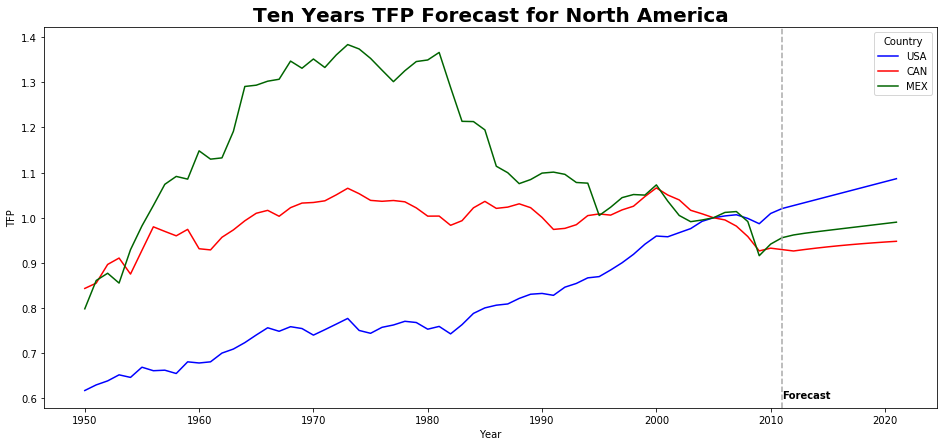

In [40]:
sns.lineplot(x = "year", y = "rtfpna", hue="isocode", data=data1, palette = ['blue', 'red', 'darkgreen'])
plt.axvline(2011, 0,1.4, color = 'darkgrey', linestyle = 'dashed')
plt.ylabel('TFP')
plt.xlabel('Year')
plt.text(2011, 0.6, "Forecast", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.title('Ten Years TFP Forecast for North America', size = 20, weight='semibold')
plt.legend(title = 'Country', labels = ['USA', 'CAN', 'MEX'])
plt.show()

<h2>Question 3</h2>

I do think that some measure of social inequality could help us better understand the Total Factor Productivity. As human capital is present into the data set accounting for years of schooling and returns to education, a measure of social inequality could account for access to goods and services that are not evenly distributed in the society and that could impact TFP. One example that I can think of is that years of study by themselves don't account for the different types of schools that people can go and how the networks they build can affect their professional lifes and thus it can impact their contributions to the TFP. Therefore, I think that years of study are more important to the TFP the more unequal the society is.